# Introdução 

Em uma cidade ficcia foi medido dados de 5 sensosres quíímicos de um dipostivo multisensor(PTXX.SX).O dispositivo estava localizado a níível da rua, dentro deuma cidade significativamente poluído. Os dados foram registrados de março de 2024 a fevereiro de 2005.

Entre estes dados medidos é desejado criar um modelo estatistico que estime a emição de CO desta cidade.

# Informações dos dados obtidos.

O conjunto de dados contém 9358 resultados médios de 5 sensores químicos de um dispositivo multisensor (PTXX.SX). O dispositivo estava localizado a nível da rua, dentro de uma cidade significativamente poluída. Os dados foram registrados de março de 2004 a fevereiro de 2005 (um ano). Valores ausentes são marcados com o valor -200. A medida de outros sensores também está disponível e algumas podem ser redundantes. ***A variável chave a ser analisada é PT08.S1 (CO), concentração de CO na atmosfera.***
Informação das colunas:

1.  Date (DD/MM/YYYY)
2.  Time (HH.MM.SS)
3.  PT08.S1 (CO) – Variável de predição
4.  Non Metanic HydroCarbons Concentration (mg/m^3)
5.  Benzene Concentration (mg/m^3)
6.  PT08.S2 (NMHC)
7.  NOx Concentration (ppb)
8.  PT08.S3 (NOx)
9.  NO2 Concentration (mg/m^3)
10. PT08.S4 (NO2s)
11. PT08.S5 (O3)
12. Temperature (C)
13. Relative Humidity (%)
14. AH Absolute Humidity
  


# Objetivo.
 
Essa parte tem como objetivo tratar os dados disponibilizados pelo dataset.
 
* Uma informação sobre essa parte é de que os dados faltantes dos sensores estão sendo preenchidos com os valores de -200.
 

 


# Funções.

In [ ]:
#Funções.

def desc_df(df):
# Esta função descreve a estrutura do conjunto de dados utilizado, no caso ela informa sobre o conjunto de dados 
# o seu tamanho, o tipo de cada coluna e a porcentagem de dados faltantes para cada coluna.

  print('Sobre os tamanho do conjunto de dados')
  print('Número de Linhas: ', df.shape[0])
  print('Número de colunas:', df.shape[1],'\n')


  print('Tipos das colunas')
  print(df.dtypes,'\n')


  print('\n')
  print('Sobre os Dados faltantes')
  if np.sum(df.isnull().sum(axis = 0)/df.shape[1] == 0) == df.shape[1]:
    print('Não existe dados faltantes','\n')
  else:
    print('Existe dados faltantes')
    print('dados faltantes nos dados de treiamento: \n',np.sum(df.isnull(),axis = 0)/df.shape[1] == 0,'\n')

  print('\nnúmero de dados unicos')
  for i in range(df.shape[1]):
    print(df.columns[i] ,':' ,len(np.unique(df[df.columns[i]])))


# Bibliotecas

In [ ]:
# import pandas as pd
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns



from datetime import datetime

Mounted at /content/drive


# Importado os dados

In [ ]:
df = pd.read_csv('/content/drive/My Drive/qualidade_do_ar.csv', encoding = "UTF-8", sep = ";", header = 0,parse_dates=['Date'],decimal = ',',dayfirst = True)


In [ ]:
df.head() # visualizando os dados.

,Date,Time,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18.00.00,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004-03-10,19.00.00,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10,20.00.00,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004-03-10,21.00.00,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004-03-10,22.00.00,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


# Estrutura do dataset

In [ ]:
desc_df(df)

Sobre os tamanho do conjunto de dados
Número de Linhas:  9357
Número de colunas: 14 

Tipos das colunas
Date             datetime64[ns]
Time                     object
PT08.S1(CO)               int64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)             int64
NOx(GT)                   int64
PT08.S3(NOx)              int64
NO2(GT)                   int64
PT08.S4(NO2)              int64
PT08.S5(O3)               int64
T                       float64
RH                      float64
AH                      float64
dtype: object 



Sobre os Dados faltantes
Não existe dados faltantes 


número de dados unicos
Date : 391
Time : 24
PT08.S1(CO) : 1042
NMHC(GT) : 430
C6H6(GT) : 408
PT08.S2(NMHC) : 1246
NOx(GT) : 926
PT08.S3(NOx) : 1222
NO2(GT) : 284
PT08.S4(NO2) : 1604
PT08.S5(O3) : 1744
T : 437
RH : 754
AH : 6684


* Antes de prosseguir com as análises será visto o intervalo de aquisição de uma amostra. 

* Para ver se esse intervalo está sendo feito de forma regular ou não. 

*Ou se houve em algum momento que não aconteceu nenhuma aquisição de dados.





 # Intervalo entre as amostras.
 
* Primeiro será visto o intervalo de tempo entre cada amostra que foi adquirido.
 
* Para fazer esse cálculo será suposto que foram adquirindo dados em todos os dias.

In [ ]:
df['Time'] =df['Time'].str.replace('.',':')

In [ ]:
hora = []
minulto = []
segundo = []

for i in range(df.shape[0]):
  dados = df['Time'][i].split(':')
  hora.append(int(dados[0]))
  minulto.append(int(dados[1]))
  segundo.append(int(dados[2]))

In [ ]:
intervalo = np.array(hora)*60*60 + np.array(minulto)*60 + np.array(segundo)

In [ ]:
print('Valores dos intervalos de aquisição:',np.unique(np.diff(intervalo)))


Valores dos intervalos de aquisição: [-82800   3600]


In [ ]:
# passando estes valores para segundos

In [ ]:
# Passando o intervalo para hora
np.unique(np.diff(intervalo))/(60*60)

array([-23.,   1.])

* Existem dois intervalos de tempo em horas: um é 1 e outro de -23 horas. Esse valor negativo está acontecendo pelo fato de que a meia noite nos dados é marcado como 0 horas. Logo o intervalo entre uma amostra e outra é de 1 hora.
 
* Como os dados só estão sendo adquiridos a cada hora do dia. Essa coluna será convertida para um valor inteiro.
 



In [ ]:
df['Time'] = df['Time'].map({'00:00:00': 0,  '01:00:00': 1,
                             '02:00:00': 2,  '03:00:00': 3, 
                             '04:00:00': 4,  '05:00:00': 5, 
                             '06:00:00': 6,  '07:00:00': 7, 
                             '08:00:00': 8,  '09:00:00': 9,
                             '10:00:00': 10, '11:00:00': 11, 
                             '12:00:00': 12, '13:00:00': 13,
                             '14:00:00': 14, '15:00:00': 15, 
                             '16:00:00': 16, '17:00:00': 17, 
                             '18:00:00': 18, '19:00:00': 19,
                             '20:00:00': 20, '21:00:00': 21, 
                             '22:00:00': 22, '23:00:00': 23})

In [ ]:
df.head()

,Date,Time,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004-03-10,19,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10,20,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004-03-10,21,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004-03-10,22,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


* Conforme foi visto os dados estão sendo adquiridos em um intervalo de 1 hora.
 
* Após essa análise será tratado agora os dados faltantes.
 



#Dados faltantes.
 
* Tratando os dados preenchidos com os valores de -200.

In [ ]:
print('Porcentagem de dados faltantes com -200')
(np.sum(df[df.columns[1:]] == -200, axis =0)/df.shape[0])*100

Porcentagem de dados faltantes com -200


Time              0.000000
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64

* Existem muitos dados faltantes na variável *** NMHC(GT) ***, no caso 90% dos seus dados. Por causa desta quantidade ela será descartada.
 

 

In [ ]:
# elimnado  *** NMHC(GT) ***
df = df.drop(columns='NMHC(GT)')

* Outro ponto que vale destacar é que existem várias variáveis com mesma quantidade de dados faltantes, onde uma delas é os dados de Target. 

* Logo se estes dados estiverem na mesma linha que os dados faltantes do Target, estas posições do dataset serão removidas. Devido que não faz sentido eles serem tratados já que está tentando prever eles.
 



In [ ]:
# olhando essa contagem que for afirmada -200
np.sum(np.sum(df[df.columns[2:]] == -200, axis = 1) == df.shape[1] -2)

44

In [ ]:
df = df.drop(df.index[df['PT08.S1(CO)'] == -200]) # removendo essas linhas

In [ ]:
# olhando de novo a porcentagem de dados faltantes
print('Porcentagem de dados faltantes com -200')
(np.sum(df[df.columns[1:]] == -200, axis =0)/df.shape[0])*100

Porcentagem de dados faltantes com -200


Time              0.000000
PT08.S1(CO)       0.000000
C6H6(GT)          0.000000
PT08.S2(NMHC)     0.000000
NOx(GT)          17.739962
PT08.S3(NOx)      0.000000
NO2(GT)          17.773329
PT08.S4(NO2)      0.000000
PT08.S5(O3)       0.000000
T                 0.000000
RH                0.000000
AH                0.000000
dtype: float64

In [ ]:
df.index = np.arange(df.shape[0]) # reagrupando o index dos dados

* As variáveis NOx(GT) e NO2(GT) ainda estão sendo preenchidas com uma porcentagem de dados faltantes considerável. Por esse motivo será visto algumas características dessas variáveis poder ver qual é a melhor decisão para preencher esses dados.


### NOx(GT) e NO2(GT)

**Ditribuição dos dados**

In [ ]:
# Antes de prosseguir com as análises irei gerar uma cópia do dataset já que irei começar injetar dados nele.
df1 = df.copy()

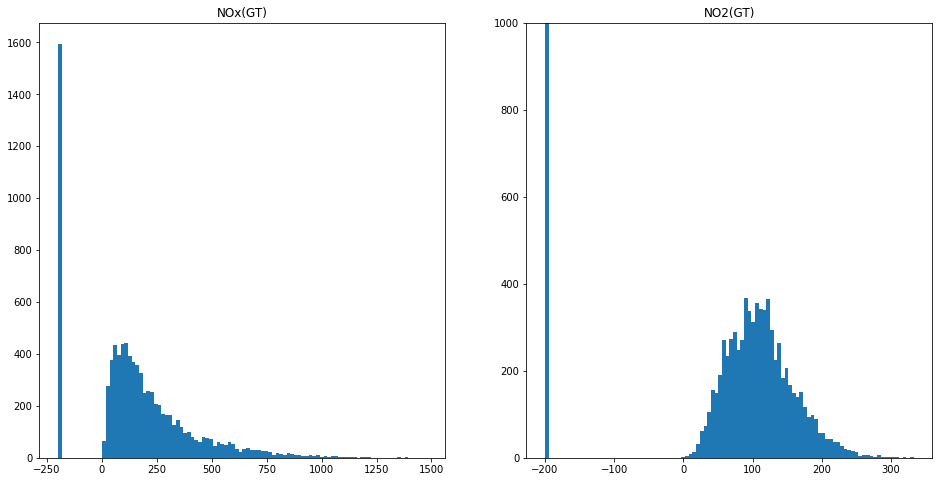

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('NOx(GT)')
plt.hist(df1['NOx(GT)'], bins = 100)
plt.subplot(1,2,2)
plt.title('NO2(GT)')
plt.hist(df1['NO2(GT)'], bins = 100)
plt.ylim(0,1000)
plt.show()

In [ ]:
concentracao_NOx = df1.groupby('Time').mean()['NOx(GT)']
concentracao_NO2 = df1.groupby('Time').mean()['NO2(GT)']

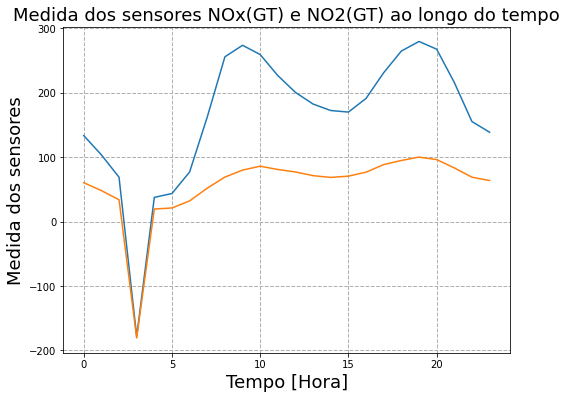

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Medida dos sensores NOx(GT) e NO2(GT) ao longo do tempo', size=18)
plt.plot(concentracao_NOx,label ='NOx(GT)')
plt.plot(concentracao_NO2,label = 'NOx(GT)')
plt.grid(linestyle='--', linewidth=1)
plt.ylabel('Medida dos sensores', size=18)
plt.xlabel('Tempo [Hora]', size=18)
plt.show()

 
 
* Pelo comportamento do gráfico dá para perceber que a maioria dos dados faltantes estão acontecendo no mesmo horário. Agora será visto em qual horário está acontecendo os demais dados faltantes.
 



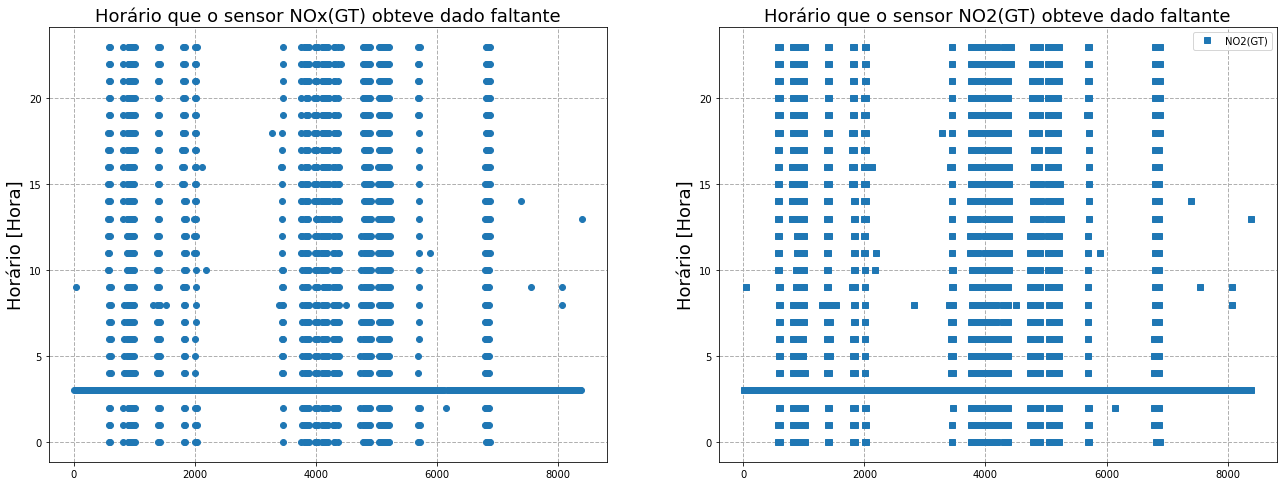

In [ ]:
plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
plt.title('Horário que o sensor NOx(GT) obteve dado faltante',size=18 )
plt.plot(df1['Time'][df1['NOx(GT)'] == -200],'o',label = 'NOx(GT)') 
plt.ylabel('Horário [Hora]', size=18)
plt.grid(linestyle='--', linewidth=1)
plt.subplot(1,2,2)
plt.title('Horário que o sensor NO2(GT) obteve dado faltante',size=18 )
plt.plot(df1['Time'][df1['NO2(GT)'] == -200],'s',label = 'NO2(GT)')
plt.grid(linestyle='--', linewidth=1)
plt.ylabel('Horário [Hora]',size=18)
plt.legend()

* O resultado deixa claro que a maioria dos dados faltantes está acontecendo as 3 horas da manhã e os demais estão distribuídos aleatoriamente durantes o horários dos demais dias.
 
* Isso deixa claro um questionamento.
 * Quantos dias em que existem dados faltantes as 3 horas ?
 
 
 
 
 
 
 
 



In [ ]:
print('Dias com dados faltantes no sensor NOx(GT):',100*np.sum(df1['Time'][df1['NOx(GT)'] == -200] == 3)/len(np.unique(df1['Date'])))
print('Dias com dados faltantes no sensor NO2(GT):',100*np.sum(df1['Time'][df1['NO2(GT)'] == -200] == 3)/len(np.unique(df1['Date'])))

Dias com dados faltantes no sensor NOx(GT): 91.38381201044386
Dias com dados faltantes no sensor NO2(GT): 91.38381201044386


* 91 % dos dias estão com dados faltantes nos dois sensores. Isso deixa uma premissa muito forte que aconteceu algum problema nesses sensores.
 
 
* Agora será visto qual foi o período de dias que o sensor estava funcionando.
 



In [ ]:
df1['Date'][df1['NOx(GT)'] == -200][df1['Time'][df1['NOx(GT)'] == -200] != 3].dt.date.unique()

array([datetime.date(2004, 3, 12), datetime.date(2004, 4, 3),
       datetime.date(2004, 4, 4), datetime.date(2004, 4, 5),
       datetime.date(2004, 4, 14), datetime.date(2004, 4, 15),
       datetime.date(2004, 4, 17), datetime.date(2004, 4, 18),
       datetime.date(2004, 4, 19), datetime.date(2004, 4, 20),
       datetime.date(2004, 4, 21), datetime.date(2004, 4, 22),
       datetime.date(2004, 4, 23), datetime.date(2004, 5, 5),
       datetime.date(2004, 5, 8), datetime.date(2004, 5, 9),
       datetime.date(2004, 5, 10), datetime.date(2004, 5, 14),
       datetime.date(2004, 5, 25), datetime.date(2004, 5, 26),
       datetime.date(2004, 5, 27), datetime.date(2004, 5, 28),
       datetime.date(2004, 6, 3), datetime.date(2004, 6, 4),
       datetime.date(2004, 6, 5), datetime.date(2004, 6, 8),
       datetime.date(2004, 6, 11), datetime.date(2004, 7, 28),
       datetime.date(2004, 8, 2), datetime.date(2004, 8, 3),
       datetime.date(2004, 8, 4), datetime.date(2004, 8, 5),
      

* Os dias que o sensores estavam em funcionamento as 3 horas  são aleatórios, isso deixa claro que a equipe que estava medido estes dados não percebeu esse problema ocorrido.
 
* Os dados faltantes dessas variáveis serão preenchidos com o valor médio da hora que ele foi adquirido.
 * A princípio esta maneira deve ser a mais correta de preencher os dados faltantes. Devido que estas variáveis podem se tratar da medida de gases que podem ser emitidos por alguma forma pela humanidade. Sendo assim, segue uma rotina de emissão. 
 



In [ ]:
# hora que teve um dado faltante
indx_time_200_NoX = np.unique(df1['Time'][df1['NOx(GT)'] == -200])
indx_time_200_No2 = np.unique(df1['Time'][df1['NO2(GT)'] == -200])

for i in range(len(indx_time_200_No2)): # indx_time_200_No2 e indx_time_200_NoX tem o mesmo tamanho este vetor.
  t = df1['NOx(GT)'][df1['Time'] == indx_time_200_NoX[i]]
  df1.loc[t[t == -200].index, 'NOx(GT)'] = np.mean(t[t > -200])
  t = df1['NO2(GT)'][df1['Time'] == indx_time_200_No2[i]]
  df1.loc[t[t == -200].index, 'NO2(GT)'] = np.mean(t[t > -200])

In [ ]:
# olhando de novo a porcentagem de dados faltantes
print('Porcentagem de dados faltantes com -200')
(np.sum(df1[df1.columns[1:]] == -200, axis =0)/df1.shape[0])*100

Porcentagem de dados faltantes com -200


Time             0.0
PT08.S1(CO)      0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
NOx(GT)          0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
dtype: float64

### Tratando outlier
 
* Como que trata de sensores que não produzem medidas negativas (menos a temperatura). Logo, se tiver algum desse valor eles serão tratados.
 
* Por esse motivo será visto a distribuição dos dados dos sensores.
 



In [ ]:
columns = df1.columns[2:] # Colunas onde estão os sensosores.

In [ ]:
len(columns)

11

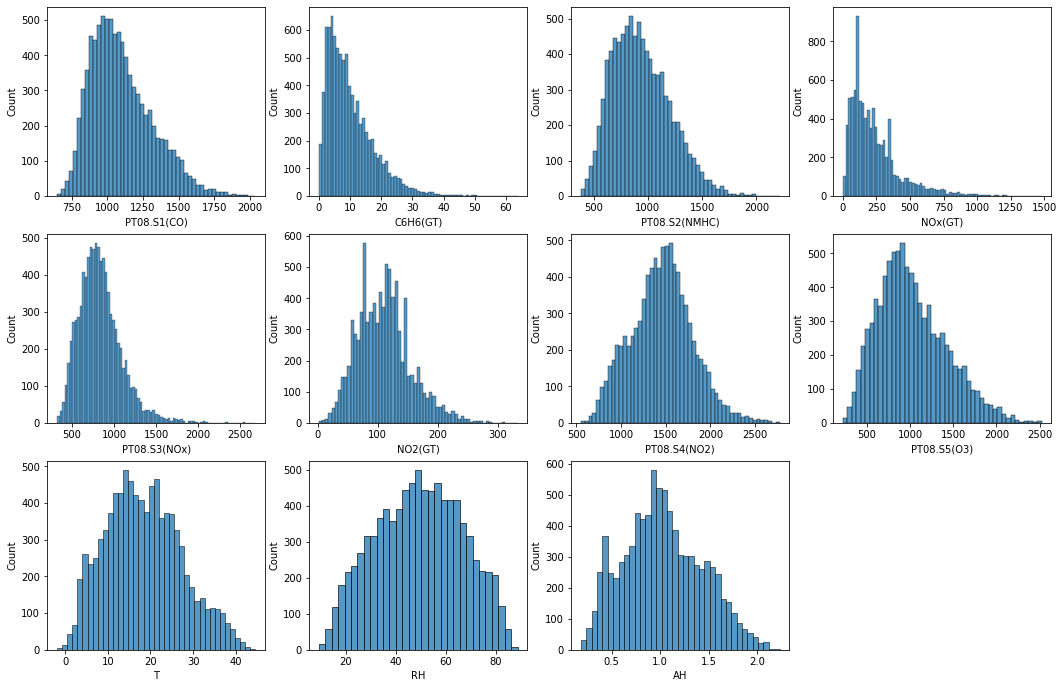

In [ ]:
plt.figure(figsize=(18,16))
for i in range(len(columns)):
  plt.subplot(4,4,i + 1)
  sns.histplot(x = columns[i], data = df1)

* Como não existem dados negativos o primeiro tratamento dos dados será considerado como completado.
 
* Por esse motivo será salvo um dataset com os dados tratados.
 



In [ ]:
df1.to_csv('/content/drive/My Drive/new_dados1.csv')

# Conclusões:
* As análises feitas mostram que os dados faltantes de todos os sensores foram deletados menos os NOx(GT) e NO2(GT). 
  * Eles foram preenchidos com os valores médios dos horários que eles foram adquiridos.
 
* Sobre esse tema ainda, aproximadamente 91 porcento dos dados que foram adquiridos às 3 horas da manhã desses dois sensores foram preenchidos com os valores de  -200. (Isso mostra que existe um problema no sistema que está medindo esses dados.)
 
 
 
 

